<a href="https://colab.research.google.com/github/Anusha5824/Face-Emotion-Detection/blob/main/ANN_FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler #Imbalanced learning provides tools to deal with classification of imbalanced classes
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential 
from keras.utils import np_utils
from keras.preprocessing import image
import scipy
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/NNDL/fer2013.csv')
df.shape

Mounted at /content/drive


(35887, 3)

In [ ]:
x_data = df['pixels']
y_data = df['emotion']

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto') #Random Oversampling involves randomly selecting examples from
# minority class with replacement, and adding them to the training dataset. "Auto"-does increase examples of every class less than majority class
x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
x_data.shape, y_data.shape

((62923, 1), (62923,))

In [ ]:
x_data = pd.Series(x_data.flatten()) #df.flatten() converts the data format to narrow format to increase the computational speed
#pd.Series contains a 1D single list with index 
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    145 134 124 127 142 151 140 116 83 74 106 103 ...
62919    152 163 175 185 194 202 198 177 154 175 200 20...
62920    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 3 6 ...
62921    70 68 72 73 74 73 90 68 78 109 129 162 199 189...
62922    34 30 37 54 78 112 148 182 194 197 202 204 204...
Length: 62923, dtype: object

In [ ]:
# Normalization -- Normalization gives equal weights/importance to each variable so that 
# no single variable steers model performance in one direction just because they are bigger numbers. 
# In grayscale the pixels range from 0(black) to 255(white)

x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data /= 255

In [ ]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0],1)
y_data.shape

(62923, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=45)
x_train.shape, y_test.shape

((56630, 2304), (6293, 1))

In [ ]:
# One hot encoding -- Converts a class vector(integers) to binary class matrix
y_train = np_utils.to_categorical(y_train, num_classes = 7)
y_test = np_utils.to_categorical(y_test, num_classes = 7)

In [ ]:
model = keras.Sequential([ # A Sequential model is a linear stack of layers
              Input(x_train.shape[1]),
              Dense(2048, activation = 'relu'), # Relu function is used to avoid Vanishing Gradient problem (when >3 layers are used)
              BatchNormalization(axis = 1), # Normalizes the data b/w intermediate layers by re-centering and re-scaling 
                                            # And speeds up the training process use higher learning rates making learning easier.
              Dense(1024, activation = 'relu'),
              BatchNormalization(axis = 1),
              Dense(512, activation = 'relu'),
              BatchNormalization(axis = 1),
              Dense(256, activation = 'relu'),
              BatchNormalization(axis = 1),
              Dense(7, activation = 'sigmoid') # Sigmoid function is used in the output layer, for a classification task o/p should be 0 or 1
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              4720640   
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2

In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.0001) # Adam optimizer is a stochastic gradient descent for training ml/deep learning algo and require fewer parameters for tuning.
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics = ['accuracy']) 
# categorical_crossentropy(softmax) loss func used in multiclass classification tasks when true labels are one-hot encoded

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

Epoch 1/50
1770/1770 [==============================] - 119s 66ms/step - loss: 1.6760 - accuracy: 0.3741 - val_loss: 1.8088 - val_accuracy: 0.3231
Epoch 2/50
1770/1770 [==============================] - 115s 65ms/step - loss: 1.4414 - accuracy: 0.4548 - val_loss: 1.7488 - val_accuracy: 0.3291
Epoch 3/50
1770/1770 [==============================] - 114s 65ms/step - loss: 1.3602 - accuracy: 0.4836 - val_loss: 1.8459 - val_accuracy: 0.2878
Epoch 4/50
1770/1770 [==============================] - 114s 64ms/step - loss: 1.2882 - accuracy: 0.5117 - val_loss: 1.5862 - val_accuracy: 0.4028
Epoch 5/50
1770/1770 [==============================] - 114s 65ms/step - loss: 1.2264 - accuracy: 0.5352 - val_loss: 1.5074 - val_accuracy: 0.4319
Epoch 6/50
1770/1770 [==============================] - 114s 65ms/step - loss: 1.1855 - accuracy: 0.5515 - val_loss: 2.1112 - val_accuracy: 0.2976
Epoch 7/50
1770/1770 [==============================] - 114s 65ms/step - loss: 1.1596 - accuracy: 0.5653 - val_loss: 1

In [ ]:
print("Accuracy of our model for validation data: ", model.evaluate(x_test,y_test)[1]*100, "%")

197/197 [==============================] - 4s 19ms/step - loss: 1.2515 - accuracy: 0.7054
Accuracy of our model for validation data:  70.53869366645813 %


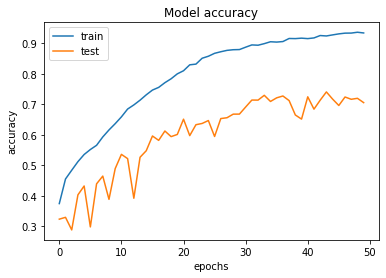

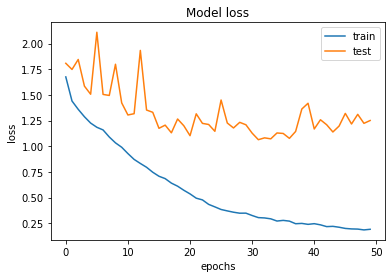

In [ ]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(('train', 'test'), loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(('train', 'test'), loc='upper right')
plt.show()

In [ ]:
# comparing the predicted values for the first 10 faces
predictions = model.predict(x_test)
y_pred = []

for p in predictions :
  y_pred.append(np.argmax(p)) # argmax func returns the index of the maximum value along an axis.
y_pred[:10]

[6, 5, 5, 6, 1, 0, 3, 2, 1, 3]

In [ ]:
y_actual = []

for a in y_test :
  y_actual.append(np.argmax(a))
y_actual[:10]

[6, 5, 5, 6, 1, 0, 3, 4, 1, 3]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       935
           1       0.95      0.99      0.97       895
           2       0.63      0.73      0.68       880
           3       0.54      0.57      0.56       906
           4       0.61      0.62      0.62       888
           5       0.83      0.80      0.81       869
           6       0.65      0.59      0.62       920

    accuracy                           0.71      6293
   macro avg       0.71      0.71      0.71      6293
weighted avg       0.71      0.71      0.71      6293



Text(69.0, 0.5, 'Truth')

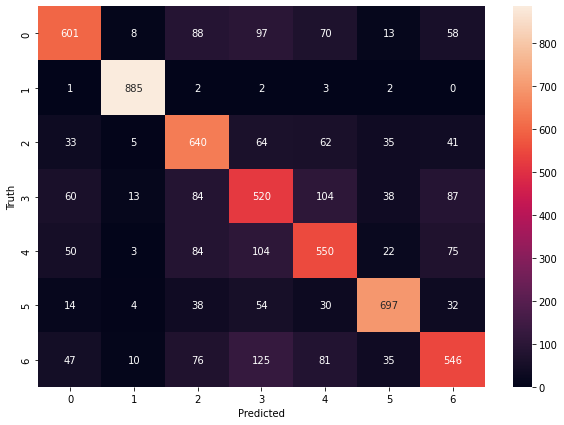

In [ ]:
import seaborn as sn 
# A confusion matrix is used to describe the performance of a classification model on a set of test data for which the true values are known
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')